## MALL CUSTOMER CLUSTERING ANALYSIS

##### importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

##### Importing Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### Shape

In [4]:
df.shape

(200, 5)

##### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##### Null Values

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No null values found

##### Duplicate values

In [7]:
df.duplicated().sum()

0

No duplicate values found

##### Summary of dataset

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### Dropping unwanted column

In [9]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [10]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


##### Numerical columns

In [11]:
numerical_cols = df.select_dtypes(exclude = 'O')
numerical_cols.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

##### Categorical Columns

In [12]:
categorical_cols = df.select_dtypes(include = 'O')
categorical_cols.columns

Index(['Gender'], dtype='object')

### EDA

In [13]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

C:\Users\bhush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


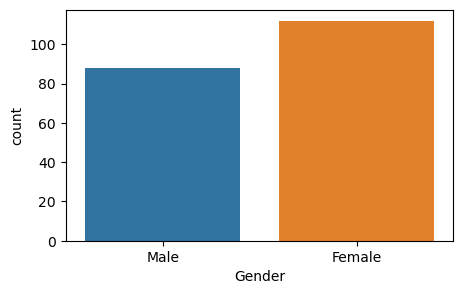

In [14]:
plt.figure(figsize=(5,3))
sns.countplot(df.Gender)
plt.show()

In [15]:
df.Age.value_counts().head()

32    11
35     9
19     8
31     8
30     7
Name: Age, dtype: int64

C:\Users\bhush\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


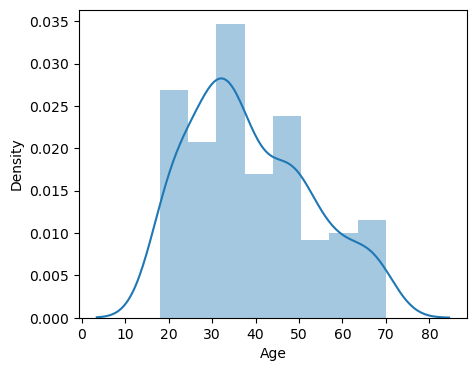

In [16]:
plt.figure(figsize=(5,4))
sns.distplot(df.Age)
plt.show()

In [17]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

C:\Users\bhush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhush\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


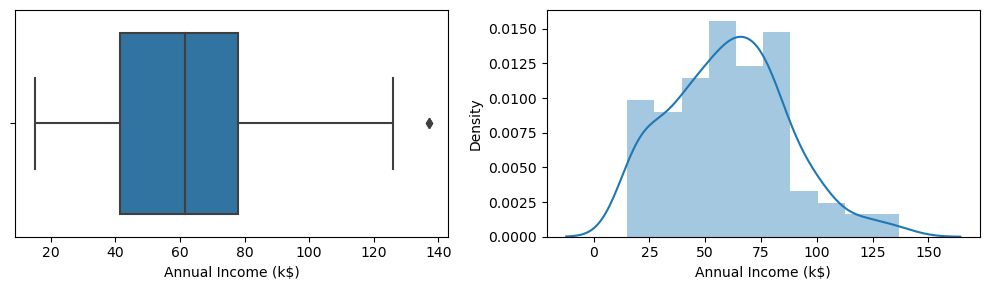

In [18]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot(df['Annual Income (k$)'])

plt.subplot(1,2,2)
sns.distplot(df['Annual Income (k$)'])
plt.tight_layout()
plt.show()

In [19]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

C:\Users\bhush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhush\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


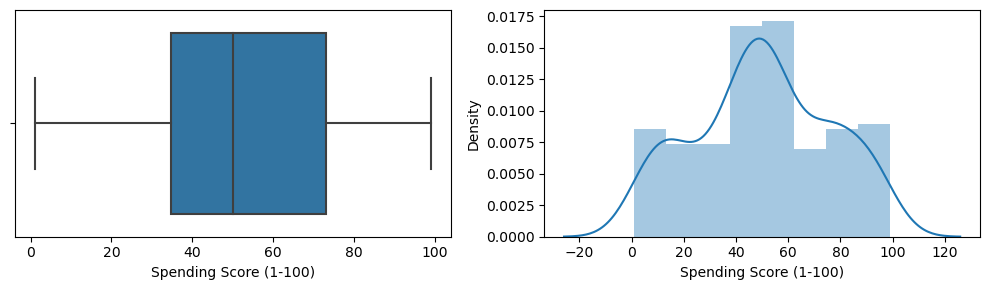

In [20]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot(df['Spending Score (1-100)'])

plt.subplot(1,2,2)
sns.distplot(df['Spending Score (1-100)'])
plt.tight_layout()
plt.show()

### Bivariate Analysis

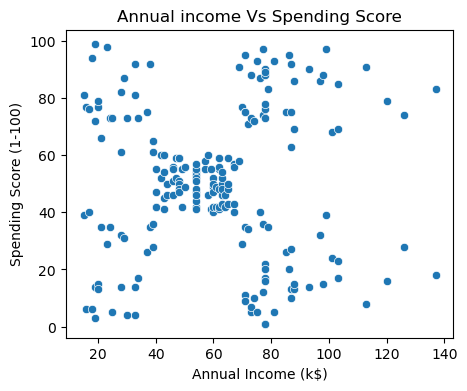

In [21]:
plt.figure(figsize=(5,4))
sns.scatterplot(data = df, x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'])
plt.title("Annual income Vs Spending Score")
plt.show()

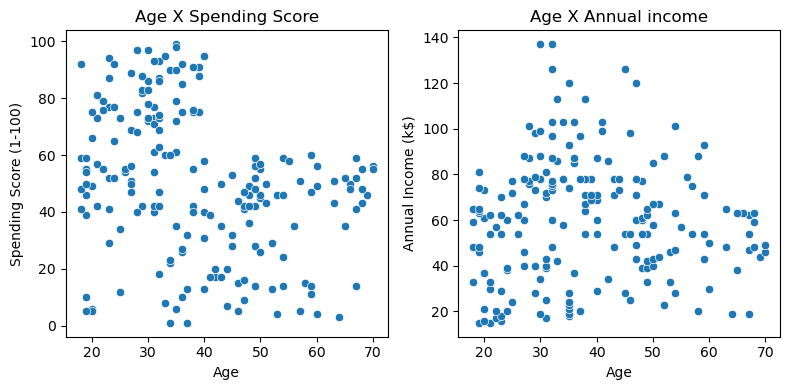

In [22]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = df['Age'], y = df['Spending Score (1-100)'])
plt.title("Age X Spending Score")

plt.subplot(1,2,2)
sns.scatterplot(data = df, x = df['Age'], y = df['Annual Income (k$)'])
plt.title("Age X Annual income")
plt.tight_layout()
plt.show()

### Multivariate Analysis

<Figure size 1000x1000 with 0 Axes>

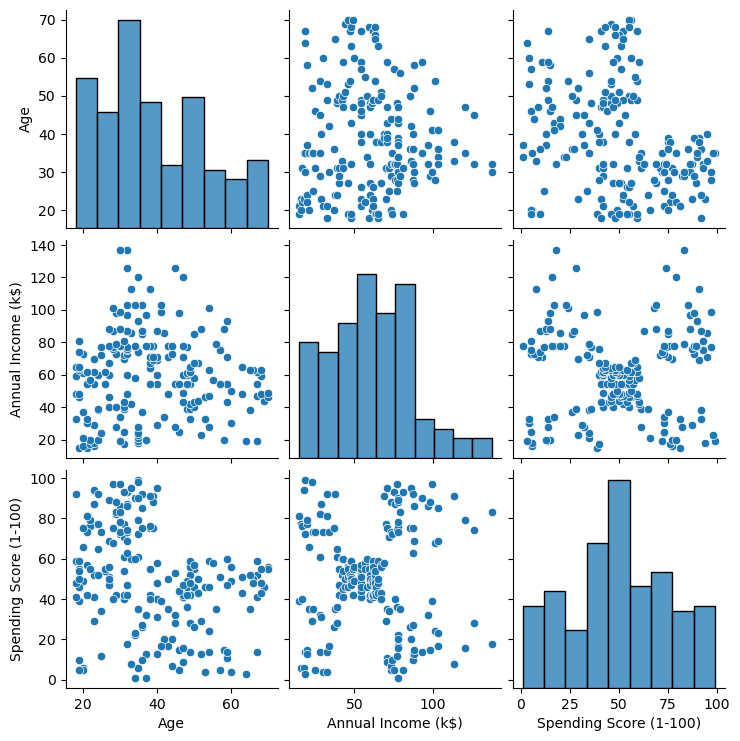

In [23]:
plt.figure(figsize=(10,10))
sns.pairplot(df)

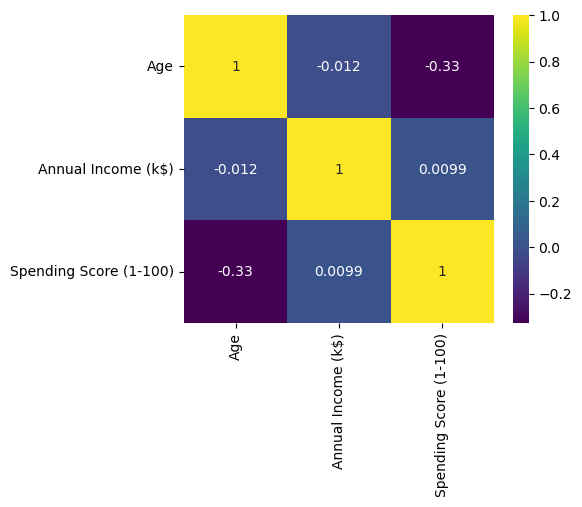

In [24]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot =True,cmap='viridis')
plt.show()

In [25]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


### Clustering 

In [26]:
clustering1 = KMeans(n_clusters= 3)

In [27]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [28]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [29]:
df['Income cluster'] = clustering1.labels_

In [30]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [31]:
df['Income cluster'].value_counts()

2    90
0    74
1    36
Name: Income cluster, dtype: int64

In [32]:
clustering1.inertia_

23517.330930930937

In [33]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

C:\Users\bhush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3976.358363858364,
 2906.6036019536023,
 2269.356837606838,
 1745.8751748251748]

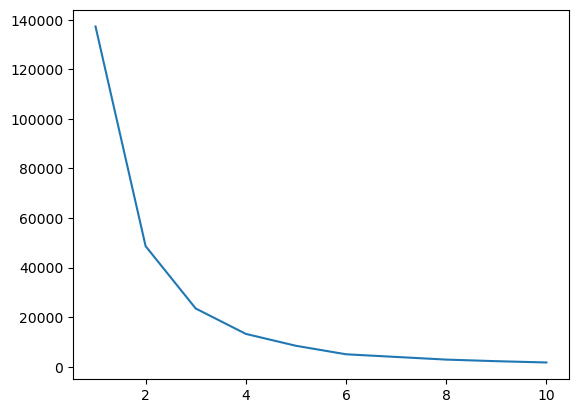

In [35]:
plt.plot(range(1,11),inertia_scores)

In [36]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster'],
      dtype='object')

In [37]:
df.groupby('Income cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

C:\Users\bhush\AppData\Local\Temp\ipykernel_21580\835091410.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Income cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


### Bivariate_clustering

In [38]:
clustering2 = KMeans(n_clusters= 5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending X income Cluster'] = clustering2.labels_

In [39]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending X income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,4
2,Female,20,16,6,0,3
3,Female,23,16,77,0,4
4,Female,31,17,40,0,3


In [40]:
df['Spending X income Cluster'].value_counts()

0    81
1    39
2    35
3    23
4    22
Name: Spending X income Cluster, dtype: int64

In [41]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters= i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

C:\Users\bhush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


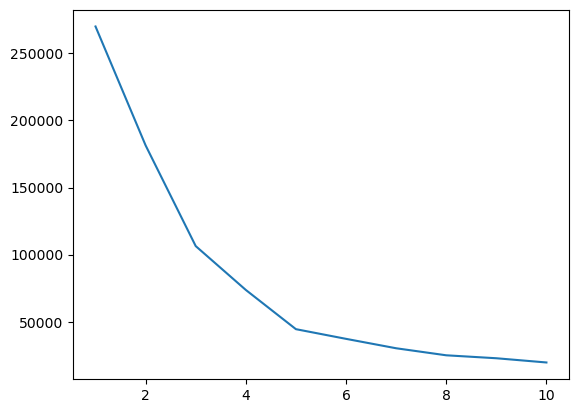

In [42]:
plt.plot(range(1,11),inertia_scores2)

In [43]:
cntr =pd.DataFrame(clustering2.cluster_centers_)
cntr.columns = ['x','y']

<IPython.core.display.Javascript object>

In [44]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster', 'Spending X income Cluster'],
      dtype='object')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

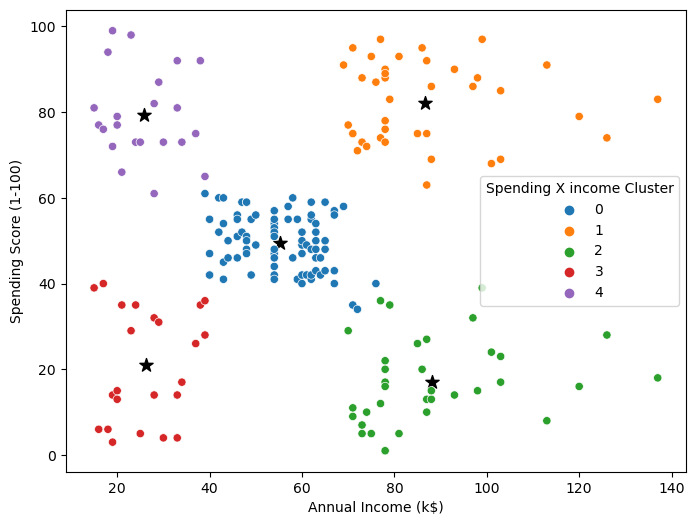

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(x = cntr['x'],y=cntr['y'], s=100, c='black',marker = '*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending X income Cluster',palette='tab10')

In [47]:
pd.crosstab(df['Spending X income Cluster'],df['Gender'],normalize = 'index')

<IPython.core.display.Javascript object>

Gender,Female,Male
Spending X income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.608696,0.391304
4,0.590909,0.409091


In [48]:
df.groupby('Spending X income Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

C:\Users\bhush\AppData\Local\Temp\ipykernel_21580\2778570265.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Spending X income Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending X income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scale = StandardScaler()

In [51]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending X income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,4
2,Female,20,16,6,0,3
3,Female,23,16,77,0,4
4,Female,31,17,40,0,3


In [52]:
df1 = pd.get_dummies(df,drop_first = True)
df1.head()

<IPython.core.display.Javascript object>

,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending X income Cluster,Gender_Male
0,19,15,39,0,3,1
1,21,15,81,0,4,1
2,20,16,6,0,3,0
3,23,16,77,0,4,0
4,31,17,40,0,3,0


In [53]:
df1.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income cluster',
       'Spending X income Cluster', 'Gender_Male'],
      dtype='object')

In [63]:
#df1 = df1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
#df1.head()

In [58]:
df1 = scale.fit_transform(df1)

In [59]:
df1 = pd.DataFrame(scale.fit_transform(df1))
df1.head()

<IPython.core.display.Javascript object>

,0,1,2,3,4,5
0,-1.424569,-1.738999,-0.434801,-1.197342,1.204874,1.128152
1,-1.281035,-1.738999,1.195704,-1.197342,1.926355,1.128152
2,-1.352802,-1.700830,-1.715913,-1.197342,1.204874,-0.886405
3,-1.137502,-1.700830,1.040418,-1.197342,1.926355,-0.886405
4,-0.563369,-1.662660,-0.395980,-1.197342,1.204874,-0.886405


C:\Users\bhush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


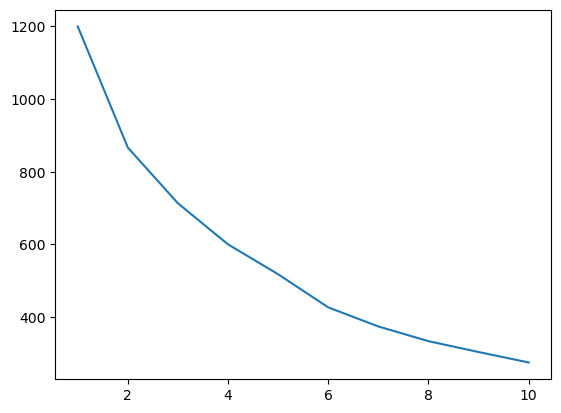

In [60]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df1)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [61]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending X income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,4
2,Female,20,16,6,0,3
3,Female,23,16,77,0,4
4,Female,31,17,40,0,3
...,...,...,...,...,...,...
195,Female,35,120,79,1,1
196,Female,45,126,28,1,2
197,Male,32,126,74,1,1
198,Male,32,137,18,1,2


In [62]:
df.to_csv('Clustering.csv')